# Big Data Management and Processing Assignment 

## In this excercise, the idea is to _"Setup a number of VMs of different size (i.e., 1, 2, 4, 8 GBs of RAM) and run a data intensive load (e.g. external sorting) and measure its effects on the performance of the VM using suitable measures"._ 

## The rest of the document is comprised of two segments; the first one is how we enable access to a VM using Google Cloud, and how we use SSH connection so that we perform all commands from the Web SSH Browser (without having to connect to the VMs using RDP). The second segment is the data-intensive functions. 

## The final goal of the excercise is to evaluate how VMs with different characteristics, such as RAM capacity, respond to the data-intensive task. 

### **Segment-1: Interaction with the VMs via Google Cloud**

In [ ]:
# First thing is to create an instance for the VM. We use a debian boot disk
# and machine type of our preference. After creating, we click the SSH connection 
# and "Authorize". Once the terminal is open, we perform the following commands
# for package and environment update as well as we download python and install 
# a few packages useful for the data-intensive task that's coming next.  

sudo apt update
sudo apt install python3

sudo apt install python3-pip
sudo apt-get install python3-pip python-dev
sudo apt-get install sysstat  # On Debian/Ubuntu

# to measure the disk performance I use the following command
# which takes snapshots of the disk for the specified seconds 
# we allow (30 in my case)
sar -d 1 30



ssh-keygen -t rsa -f ~/.ssh/<key_name> -C <username> -b 2048
# <key_name> a name you choose and could be and email for 
# the <username>

ssh-keygen -t rsa -f ~/.ssh/<key_name> -C <username> -b 2048


# We change directory to 
cd ".ssh" # 2 files exist (1) <key_name> .username (2) <key_name>.pub


# open <key_name>.pub
cat <key_name>.pub

# Then we do to GCloud VMs and we select the instance of the VM.
# We go to edit and to the SSH keys and click Add item and paste the
# RSA key copied in the terminal 

# Then, we start installing python packages in cmd
pip3 install numpy matplotlib
pip3 install pandas
pip3 install xsorted

import pandas as pd
import random
import time
from functools import reduce
from time import time
import os, sys, csv, time
from xsorted import xsorted, xsorter








### **Segment-2: Data-intensive task**


- The idea is simple. We create datasets with random information inside and we time how long it takes for the output to be generated as well as we evaluate the performance of the VMs. 

In [31]:
# setting the number of generated datasets for the excercise here
xx = 7

In [16]:
import random
import time
import string

def data_generator(datapoints):
    # each datapoint has a userid, a score, a rank, and few random letters (i.e. could be a text)
    dataset = []
    for i in range(datapoints):
        userid = 'user' + str(i)
        score = random.randint(1, 100000)
        rank  = random.randint(1,100000000)
        random_letter = ''.join(random.choices(string.ascii_letters, k=50))        
        dataset.append((userid, score, rank, random_letter ))        
    random.shuffle(dataset)
    return dataset

In [32]:
# we check the output 
data_generator(xx)

[('user0',
  65221,
  46297419,
  'gCxKSeMNPjJAIbHLMqEDysChZomXJPGodgFqXPUVEbqTsjVgLb'),
 ('user1',
  7573,
  46883397,
  'HVgkXDZauQgteqzqPmTBoOHNNwUKbvoYrZzANMqunnclPlmyzK'),
 ('user4',
  29715,
  75543355,
  'tZnzxBvMrzDvBGLqjDgaJhBSIpJbIcmajuEHYHqbxaZBwkzPDw'),
 ('user3',
  40940,
  71080787,
  'dUNcOYVsORhEKpOzOEaMPXdFoOfnFUyiZvgWcELxHODPhnNxrB'),
 ('user6',
  96095,
  18319610,
  'ZkyjTtqZvRNidalkqwIUJdIFuiATtbwvyerhvDutrBFdMclmJH'),
 ('user2',
  32824,
  14096655,
  'iiBNxEmaDfynjVULxxkqfXrLbAzlswbQTOOfzSAtGGnSNgcvzS'),
 ('user5',
  17022,
  91491800,
  'OTTqsvIpZWJmFSiFrjKuhQdQIDaRrwfZVZneXQAbAJSQzDbaMG')]

In [18]:
# using the data_generator function, we proceed by generating 
# the datasets in current directory 

import os, sys, csv, time
def generate_datasets(exp):
    for i in range(exp):
        dataset_list = data_generator(10**(i+1))
        print('finished d')
        fname = 'dataset_exp_' + str(i+1) + '.csv'
        print(f'The name of the file is {fname}')
        with open(fname, 'w') as unsorted_f:
            writer = csv.writer(unsorted_f)
            for item in dataset_list:
                writer.writerow(item)

In [33]:
generate_datasets(xx)

finished d
The name of the file is dataset_exp_1.csv
finished d
The name of the file is dataset_exp_2.csv
finished d
The name of the file is dataset_exp_3.csv
finished d
The name of the file is dataset_exp_4.csv
finished d
The name of the file is dataset_exp_5.csv
finished d
The name of the file is dataset_exp_6.csv
finished d
The name of the file is dataset_exp_7.csv


In [27]:
# Function to external sort and save the document generated above
# while timing the results.The idea is that it reads and writes 
# the file in disk so that to reduce the capacity needed for the CPU 
# to perform its operations. Trade-off between CPU and Disk operations.

from xsorted import xsorted, xsorter
def xsort_bench(exp=1):
    timings = []
    for i in range(exp):
        tstart = time.time()
        fname =  'dataset_exp_' + str(i+1) + '.csv'
        xsorted_custom = xsorter(partition_size=100000)
        with open(fname, 'r') as unsorted_f, open((fname) , 'w') as sorted_f:
            reader = csv.reader(unsorted_f)
            items = xsorted_custom(reader, key=lambda x: int(x[1]))
            writer = csv.writer(sorted_f)
            for item in items:
                writer.writerow(item)
        tend = time.time()
        timings.append(((i+1),tend-tstart))
    return timings

In [34]:
timings = xsort_bench(xx)
timings

[(1, 1.13700270652771),
 (2, 1.2117407321929932),
 (3, 0.9490773677825928),
 (4, 1.0137746334075928),
 (5, 1.035592794418335),
 (6, 1.02134370803833),
 (7, 1.1238207817077637)]

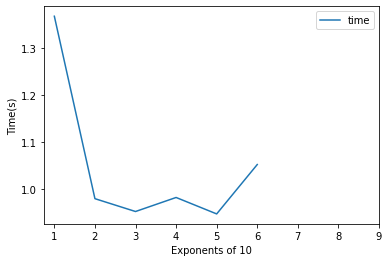

In [30]:
# we plot the results if we wish (this plotting is not done 
# in the terminal of the VM)

import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(timings, columns = ['exp', 'time'])

df.plot.line(x='exp',y='time')
plt.ylabel('Time(s)')
plt.xlabel('Exponents of 10')
plt.xticks(range(1,10))
plt.show()


In [4]:
# here we just re-create from the timings output the array in order
# to plot it next.
import numpy  as np 
mt_8 = np.array([(1, 0.2285459041595459), (2, 0.22733402252197266), (3, 0.22328853607177734), (4, 0.22285103797912598), (5, 0.22493815422058105), (6, 0.2387678623199463)])

mt_2 = np.array([(1, 0.23144366), (2, 0.2265224456), (3, 0.22883009910), (4, 0.22522902), (5, 0.232404470443), (6, 0.2383346557)])

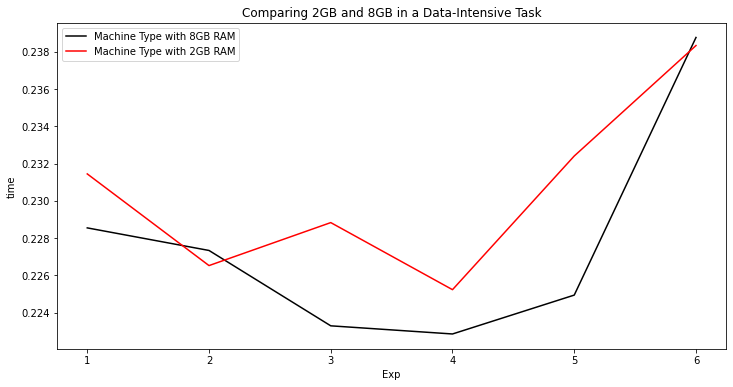

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,6))



df_8 = pd.DataFrame(mt_8, columns = ['exp', 'time'])
df_2 = pd.DataFrame(mt_2, columns = ['exp', 'time'])

ax.plot(df_8['exp'], df_8['time'], label = 'Machine Type with 8GB RAM', color = 'black')
ax.plot(df_2['exp'], df_2['time'], label = 'Machine Type with 2GB RAM', color = 'red')


ax.set_xlabel('Exp')
ax.set_ylabel('time')
ax.set_title("Comparing 2GB and 8GB in a Data-Intensive Task")
ax.legend()
plt.show()